<a href="https://colab.research.google.com/github/bella470/Python_Class_DST/blob/main/FirstProjectCO2Emission_Regression_220724.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting the Value of CO2 Emissionn


Now that you have been equipped with the skills over the course of 'Data Science and Analytics', now you have a chance to practice and apply it on a dataset.

### In this project, you need to build a model to predict the unknown value. ###


#### Thinking like a data scientist, you have to follow the data science methodology, as shown in the image below:

### 1- Businuess Understanding

Data science methodology begins with spending the time to seek clarification. What is the problem that you are trying to solve?

Our problem here is finding the value of the CO2 Emission.

Main Goal: Predict the value of CO2 emission based on single independent variable.

Main Object: Building a predictive model.

### 2- Analytic Approach

How can you use data to answer the question/solve the problem?

Selecting the right analytic approach to solve the problem. In this project the problem is about predicting the CO2 Emission. So we are going to use Simple Linear Regression algorithm to solve the problem.

### 3- Data Requirements

Necessary data content, Data Formats, Sources for initial data collection.

In thin project we need to collect data about the CO2 emission, engine size, and Fuel consumption.



### 4- Data Collection

After the initial data collection is performed, an assessment by the data scientist takes place to determine whether or not they have what they need.

### 5- Data Understanding

Data understanding encompasses all activities related to constructing the data set

In [1]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2024-07-22 06:25:34--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   408KB/s    in 0.2s    

2024-07-22 06:25:35 (408 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [2]:
import pandas as pd

df = pd.read_csv('/content/FuelConsumption.csv')

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


This data is basically clean and ready to be use but still need to practice and checked

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [9]:
ndf = df[['ENGINESIZE','ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]

ndf.corr()

,ENGINESIZE,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
ENGINESIZE,1.000000,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [4]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [5]:
df.describe(include = 'all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


### 6- Data Preparation

Together with data collection and data understanding, data preparation is the most time-consuming phase of a data science project, typically taking 70% and even up to even 90% of the overall project time.

In [6]:
df_numeric = df.select_dtypes(include=['number'])

df_numeric.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [7]:
#another way to find the correlation
ndf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]

ndf.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

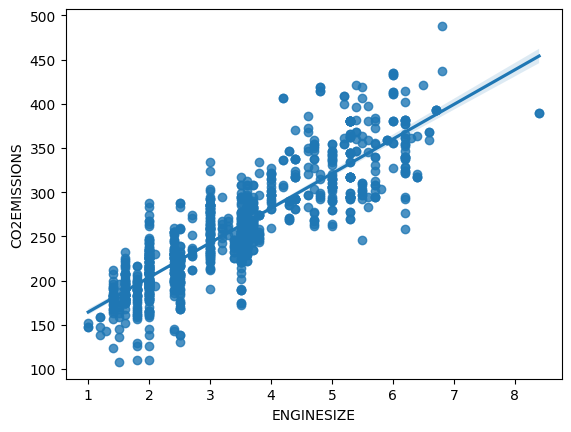

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data=df)

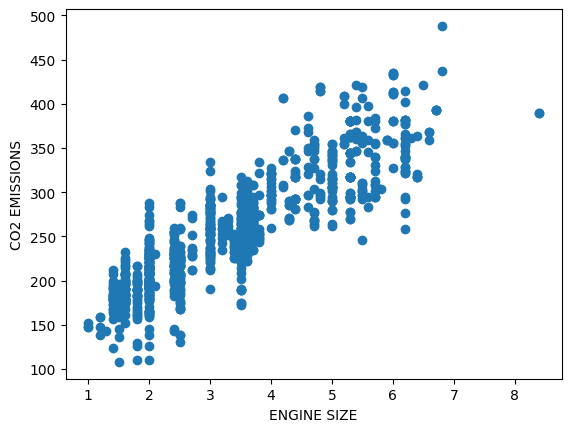

In [9]:
#scatter plot
plt.scatter(x="ENGINESIZE", y="CO2EMISSIONS", data=df)

plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSIONS")

plt.show()

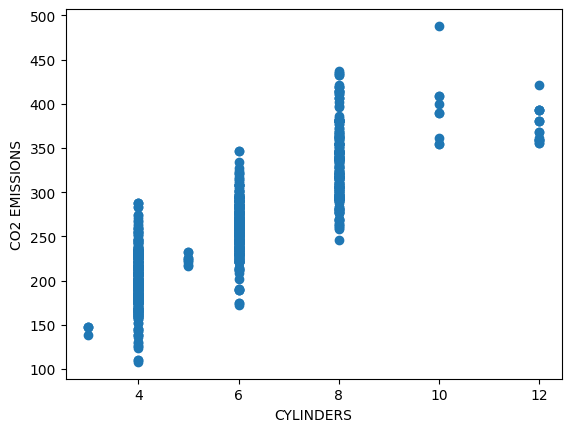

In [10]:
plt.scatter(x="CYLINDERS", y="CO2EMISSIONS", data=df)

plt.xlabel("CYLINDERS")
plt.ylabel("CO2 EMISSIONS")

plt.show()

<Axes: xlabel='CYLINDERS', ylabel='CO2EMISSIONS'>

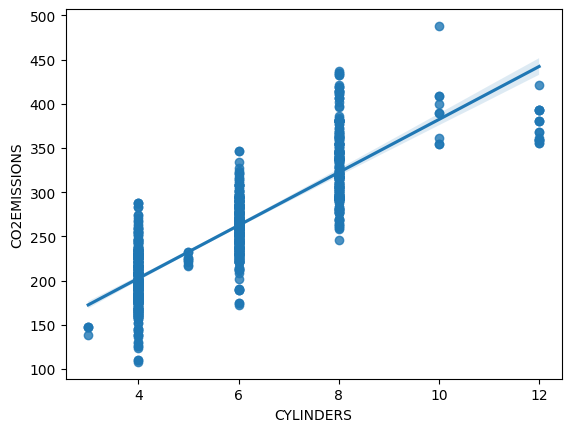

In [11]:
sns.regplot(x="CYLINDERS", y="CO2EMISSIONS", data=df)

<Axes: xlabel='FUELCONSUMPTION_CITY', ylabel='CO2EMISSIONS'>

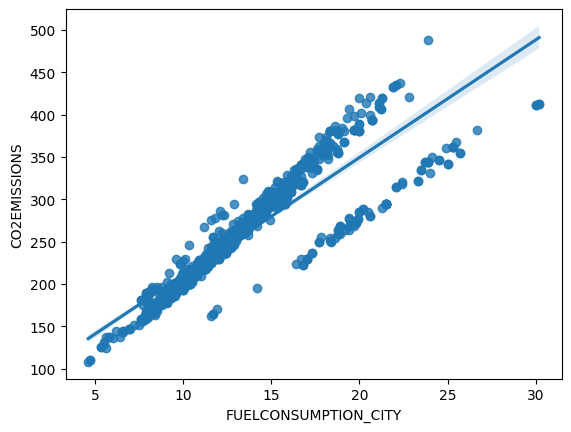

In [12]:
sns.regplot(x="FUELCONSUMPTION_CITY", y="CO2EMISSIONS", data=df)

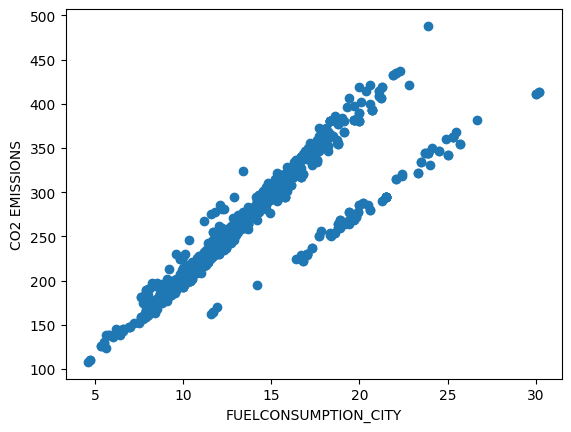

In [13]:
plt.scatter(x="FUELCONSUMPTION_CITY", y="CO2EMISSIONS", data=df)

plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("CO2 EMISSIONS")

plt.show()

<Axes: xlabel='FUELCONSUMPTION_HWY', ylabel='CO2EMISSIONS'>

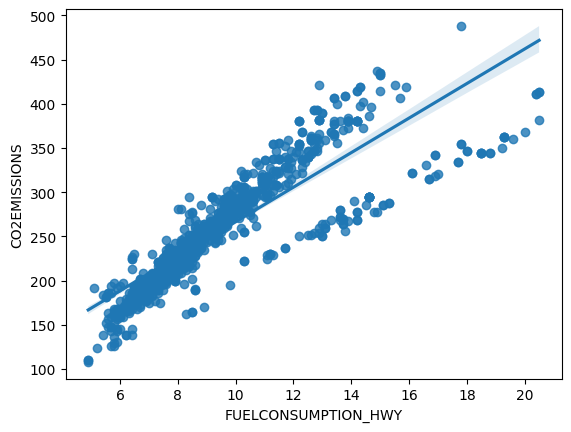

In [14]:
sns.regplot(x="FUELCONSUMPTION_HWY", y="CO2EMISSIONS", data=df)

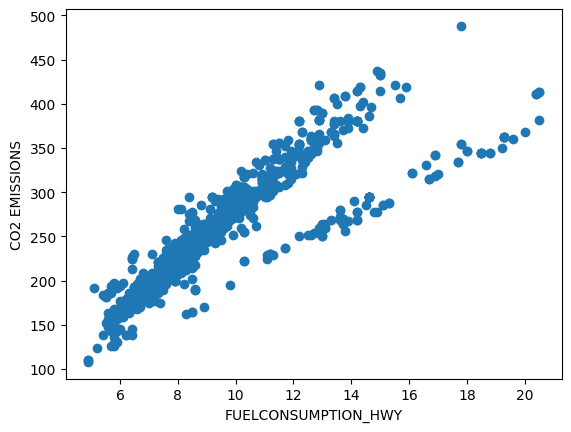

In [15]:
plt.scatter(x="FUELCONSUMPTION_HWY", y="CO2EMISSIONS", data=df)

plt.xlabel("FUELCONSUMPTION_HWY")
plt.ylabel("CO2 EMISSIONS")

plt.show()

<Axes: xlabel='FUELCONSUMPTION_COMB', ylabel='CO2EMISSIONS'>

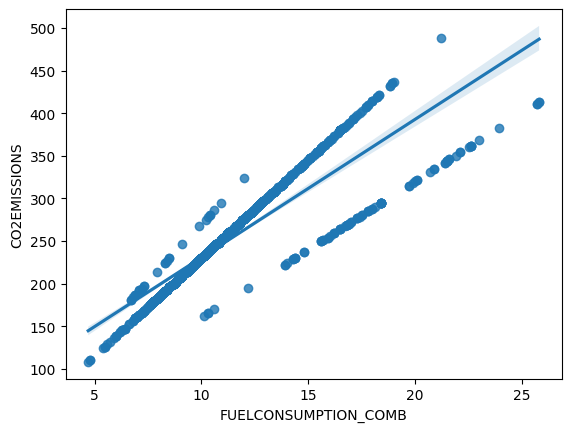

In [16]:
sns.regplot(x="FUELCONSUMPTION_COMB", y="CO2EMISSIONS", data=df)

<Axes: xlabel='FUELCONSUMPTION_COMB_MPG', ylabel='CO2EMISSIONS'>

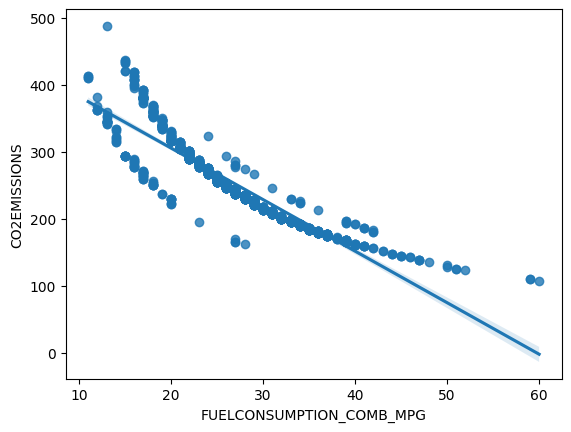

In [17]:
sns.regplot(x="FUELCONSUMPTION_COMB_MPG", y="CO2EMISSIONS", data=df)

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using *np.random.rand()* function:

In [21]:
import numpy as np

#the lenght of the dataset is less than 80% to be chosen randomly
msk = np.random.rand(len(df)) < 0.8

#80% to be use for training
train = df[msk]

#20% to be use for testing
test = df[~msk]

Train and Test dataset distribution

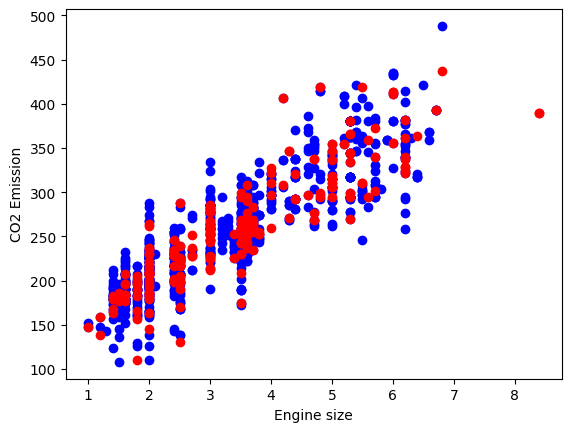

In [22]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='red')

plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show()

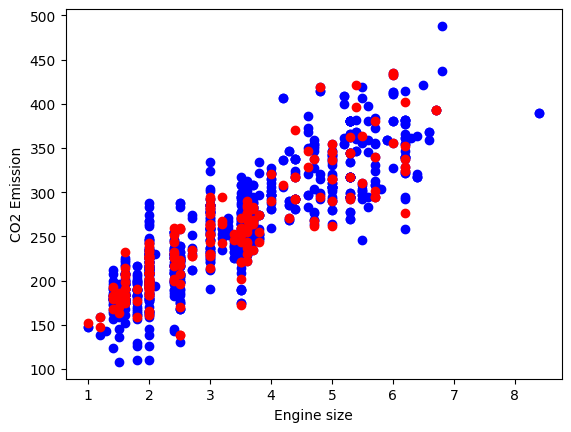

In [20]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='red')

plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show()

### 7- Modeling

In [23]:
from sklearn import linear_model

#call the algorithms and assign it to a variable
regr = linear_model.LinearRegression()

#convert the dataframe to an array
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#fit the model to the training dataset

regr.fit(train_x, train_y)

LinearRegression()

In [24]:
print ('The value of the slope is: ', regr.coef_)

print ('The value of the intercept is: ', regr.intercept_)

The value of the slope is:  [[39.27953019]]
The value of the intercept is:  [125.20465658]


Text(0, 0.5, 'Emission')

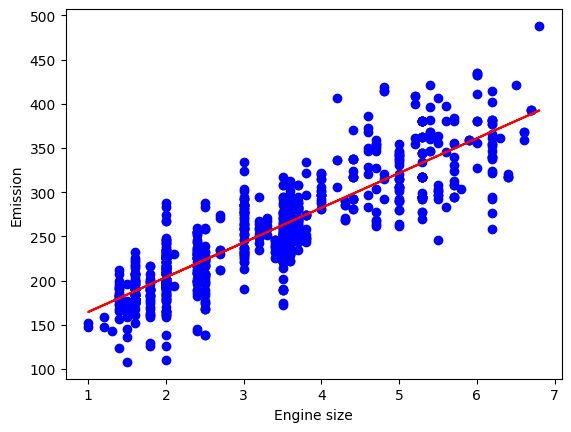

In [25]:
#best fit line by the algorithm
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [26]:
x = 2.4

#formula of linear regression
y = regr.intercept_ + regr.coef_ * x

y

array([[219.47552903]])

In [27]:
x = int(df['ENGINESIZE'].sample())

#formula of linear regression
y = regr.intercept_ + regr.coef_ * x

y

<ipython-input-27-49f7a738ea00>:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x = int(df['ENGINESIZE'].sample())


array([[203.76371696]])

### 8- Evaluation

In [28]:
from sklearn.metrics import r2_score

#testing data
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

#predict the value base on x value
test_y_ = regr.predict(test_x)

#print("The R2 is: ", r2_score (test_y, test_y_))

print("The R2 is: ", round (((r2_score(test_y, test_y_))*100),2))

print('The MSE is: ', np.mean((test_y_ - test_y)**2))

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))


The R2 is:  78.36
The MSE is:  915.6321751238148
Mean absolute error: 22.65


**Trying to check the other correlated features**

FUELCONSUMPTION_COMB_MPG vs CO2EMISSIONS

In [41]:
#call the algorithms and assign it to a variable
regr1 = linear_model.LinearRegression()

#convert the dataframe to an array
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#fit the model to the training dataset

regr1.fit(train_x, train_y)

#testing data
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

#predict the value base on x value
test_y_ = regr1.predict(test_x)

#Evaluation
print('The R2 is: ', round (((r2_score(test_y, test_y_))*100),2))
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('Mean absolute error: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
#round(((np.mean(np.absolute(test_y_ - test_y))))*100, 2))

The R2 is:  84.0
The MSE is:  67721.66
Mean absolute error: 18.02


Text(0, 0.5, 'Emission')

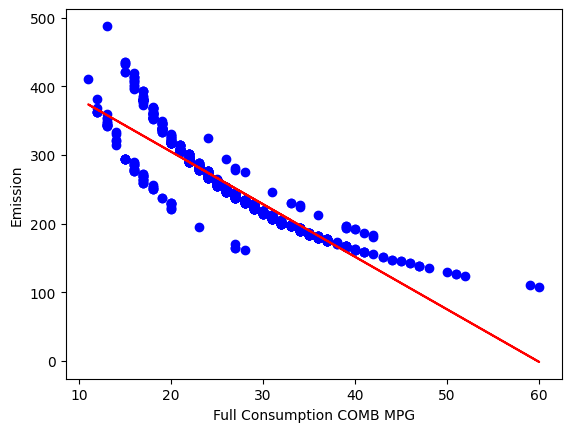

In [42]:
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr1.coef_[0][0]*train_x + regr1.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("Full Consumption COMB MPG")
plt.ylabel("Emission")

CYLINDERS vs CO2EMISSIONS

In [43]:
#call the algorithms and assign it to a variable
regr2 = linear_model.LinearRegression()

#convert the dataframe to an array
train_x = np.asanyarray(train[['CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#fit the model to the training dataset

regr2.fit(train_x, train_y)

#testing data
test_x = np.asanyarray(test[['CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

#predict the value base on x value
test_y_ = regr2.predict(test_x)

#Evaluation
print('The R2 is: ', round (((r2_score(test_y, test_y_))*100),2))
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round(((np.mean(np.absolute(test_y_ - test_y))))*100, 2))

The R2 is:  71.87
The MSE is:  119048.33
The MAE is:  2581.67


Text(0, 0.5, 'Emission')

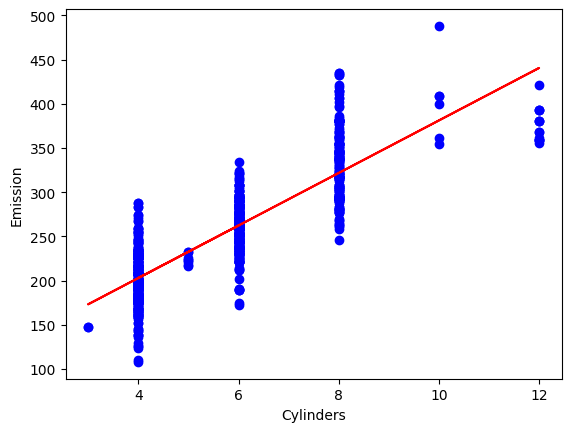

In [44]:
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr2.coef_[0][0]*train_x + regr2.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("Cylinders")
plt.ylabel("Emission")

FUEL-CONSUMPTION CITY VS CO2EMISSION

In [33]:
#call the algorithms and assign it to a variable
regr3 = linear_model.LinearRegression()

#convert the dataframe to an array
train_x = np.asanyarray(train[['FUELCONSUMPTION_CITY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#fit the model to the training dataset

regr3.fit(train_x, train_y)

#testing data
test_x = np.asanyarray(test[['FUELCONSUMPTION_CITY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

#predict the value base on x value
test_y_ = regr3.predict(test_x)

#Evaluation
print('The R2 is: ', round (((r2_score(test_y, test_y_))*100),2))
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round(((np.mean(np.absolute(test_y_ - test_y))))*100, 2))

The R2 is:  82.71
The MSE is:  73188.45
The MAE is:  1903.03


FUELCONSUMPTION_HWY VS CO2EMISSION

In [34]:
#call the algorithms and assign it to a variable
regr4 = linear_model.LinearRegression()

#convert the dataframe to an array
train_x = np.asanyarray(train[['FUELCONSUMPTION_HWY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#fit the model to the training dataset

regr4.fit(train_x, train_y)

#testing data
test_x = np.asanyarray(test[['FUELCONSUMPTION_HWY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

#predict the value base on x value
test_y_ = regr4.predict(test_x)

#Evaluation
print('The R2 is: ', round (((r2_score(test_y, test_y_))*100),2))
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round(((np.mean(np.absolute(test_y_ - test_y))))*100, 2))

The R2 is:  76.6
The MSE is:  99049.5
The MAE is:  2376.99


FUELCONSUMPTION_COMB VS CO2EMISSION

In [35]:
#call the algorithms and assign it to a variable
regr5 = linear_model.LinearRegression()

#convert the dataframe to an array
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#fit the model to the training dataset

regr5.fit(train_x, train_y)

#testing data
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

#predict the value base on x value
test_y_ = regr5.predict(test_x)

#Evaluation
print('The R2 is: ', round (((r2_score(test_y, test_y_))*100),2))
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round(((np.mean(np.absolute(test_y_ - test_y))))*100, 2))

The R2 is:  81.63
The MSE is:  77725.14
The MAE is:  1992.29


**Multiple Linear Regression**

In [45]:
#call the algorithms and assign it to a variable
regr6 = linear_model.LinearRegression()

#convert the dataframe to an array
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#fit the model to the training dataset

regr6.fit(train_x, train_y)

#testing data
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

#predict the value base on x value
test_y_ = regr6.predict(test_x)

#Evaluation
print('The R2 is: ', round (((r2_score(test_y, test_y_))*100),2))
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round(((np.mean(np.absolute(test_y_ - test_y))))*100, 2))

The R2 is:  82.78
The MSE is:  72879.38
The MAE is:  1895.69


Text(0, 0.5, 'Emission')

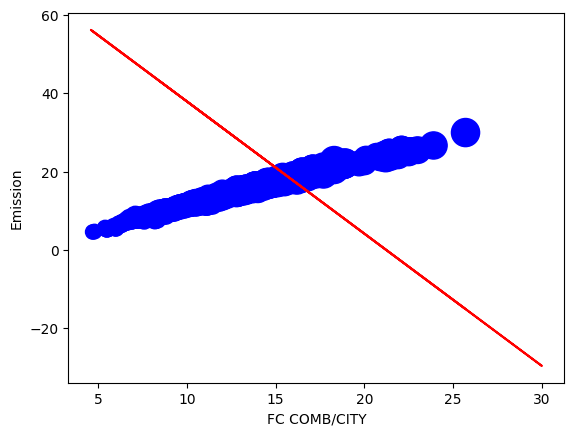

In [46]:
plt.scatter(train.FUELCONSUMPTION_COMB,train.FUELCONSUMPTION_CITY, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr6.coef_[0][0]*train_x + regr6.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("FC COMB/CITY")
plt.ylabel("Emission")

In [63]:
#call the algorithms and assign it to a variable
regr7 = linear_model.LinearRegression()

#convert the dataframe to an array
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#fit the model to the training dataset

regr7.fit(train_x, train_y)

#testing data
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

#predict the value base on x value
test_y_ = regr7.predict(test_x)

#Evaluation
print('The R2 is: ', round (((r2_score(test_y, test_y_))*100),2))
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round(((np.mean(np.absolute(test_y_ - test_y))))*100, 2))

The R2 is:  78.81
The MSE is:  89689.56
The MAE is:  2268.55


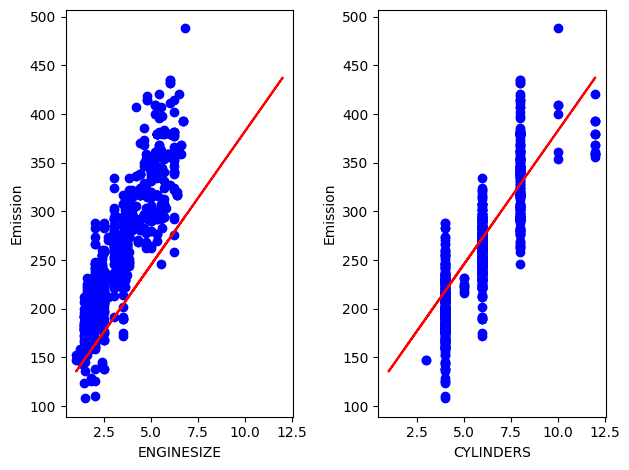

In [53]:
plt.subplot(1, 2, 1)

plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr7.coef_[0][0]*train_x + regr7.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")

plt.subplot(1, 2, 2)

plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr7.coef_[0][0]*train_x + regr7.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")

plt.tight_layout()
plt.show()

In [69]:
#call the algorithms and assign it to a variable
regr8 = linear_model.LinearRegression()

#convert the dataframe to an array
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#fit the model to the training dataset

regr8.fit(train_x, train_y)

#testing data
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

#predict the value base on x value
test_y_ = regr8.predict(test_x)

#Evaluation
print('The R2 is: ', round (((r2_score(test_y, test_y_))*100),2))
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round(((np.mean(np.absolute(test_y_ - test_y))))*100, 2))

The R2 is:  89.69
The MSE is:  43616.41
The MAE is:  1422.92


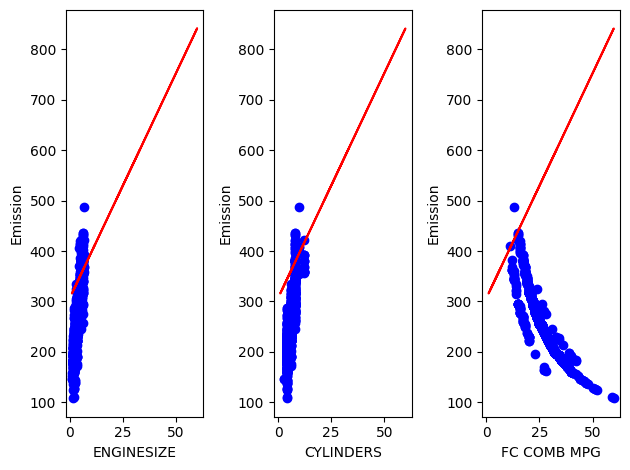

In [71]:
plt.subplot(1, 3, 1)

plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr8.coef_[0][0]*train_x + regr8.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")

plt.subplot(1, 3, 2)

plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr8.coef_[0][0]*train_x + regr8.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")

plt.subplot(1, 3, 3)

plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr8.coef_[0][0]*train_x + regr8.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("FC COMB MPG")
plt.ylabel("Emission")

plt.tight_layout()
plt.show()

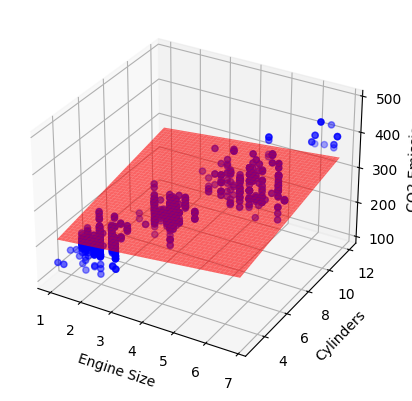

In [65]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train['ENGINESIZE'], train['CYLINDERS'], train['CO2EMISSIONS'], c='blue', marker='o')

# Generate grid for plotting regression plane
x_surf, y_surf = np.meshgrid(np.linspace(train['ENGINESIZE'].min(), train['ENGINESIZE'].max(), 100),
                             np.linspace(train['CYLINDERS'].min(), train['CYLINDERS'].max(), 100))

# For each point in the grid, we need to use the average value of FUELCONSUMPTION_COMB_MPG for prediction
z_surf = regr8.predict(np.c_[x_surf.ravel(), y_surf.ravel(), np.full(x_surf.ravel().shape, np.mean(train['FUELCONSUMPTION_COMB_MPG']))]).reshape(x_surf.shape)

#3D plot
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.6)
ax.set_xlabel('Engine Size')
ax.set_ylabel('Cylinders')
ax.set_zlabel('CO2 Emissions')
plt.show()